# Tutorial 1.3. Introduction to Statistical Quantities in Wind Engineering 
## Part 1: Basic quantities 


### Description: Wind data (measured or simulated) in wind engineering is usually recorded as a time series. Typical quantities measured are velocity (certain components) at a reference height or pressure measured at locations of interest along the structure. Evaluating the statistical quantities of these time series is a crucial task. In this tutorial a time series is generated and analyzed. Various statistical quantities, which are introduced during the lecture, are calculated for a generated signal. Some additional exercises are proposed for individual studies.

#### Students are advised to complete the proposed excercises

#### Project: Structural Wind Engineering WS 20-21 Chair of Structural Analysis @ TUM - R. Wüchner, M. Péntek, A. Kodakkal        
Author : anoop.kodakkal@tum.de, mate.pentek@tum.de

Created on:  30.11.2015

Last update: 28.10.2020

Reference: G. Coles, Stuart. (2001). An introduction to statistical modeling of extreme values. Springer. 10.1007/978-1-4471-3675-0. 

##### Contents:

 1. Generating a time series as a superposition of constant, cosine and random signals 
 2. Introduction of some common statistical tools in python
 3. Interquartile range and box plots
 4. Probability Distribution Function (PDF) 
 5. Fast Fourier Transform (FFT) 

In [1]:
# import python modules
import numpy as np
import scipy
from matplotlib import pyplot as plt
# import own modules
import custom_utilities as c_utils
from ipywidgets import interactive

#### Creating the time instances as an array

The start time, end time and the number of time steps are specified here for generating the time series. 

In [2]:
# start time
start_time = 0.0
# end time
end_time = 10.0
# steps 
n_steps = 10000
# time step
delta_time = end_time / (n_steps-1)
# time series
# generate grid size vector (array) 1D
time_series = np.arange(start_time, end_time + delta_time, delta_time)

#### Generating signals in time domain (from herein referred to as a certain series (of values)).

#####  Three signals are created. 
1. A harmonic (cosine) signal with given amplitude and frequency
2. A constant signal with given amplitude
3. A random signal with specified distribution and given properties

###### 1. Cosine signal with given amplitude and frequency 

In [3]:
# frequency of the cosine
cos_freq = 10
# amplitude of the cosine
cos_ampl = 1
# series of the cosine
cos_series = cos_ampl * np.cos(2*np.pi * cos_freq * time_series)

###### Let us look at the plot to see how the signal looks like

In [4]:
def plot_cosine_signal ( amplitude = 1, frequency = 10): 
    cos_series = amplitude * np.cos(2*np.pi * frequency * time_series)
    fig = plt.figure(num=1, figsize=(15, 4))
    ax = plt.axes()
    ax.plot(time_series, cos_series)
    ax.set_ylabel('Amplitude')
    ax.set_xlabel('Time [s]')
    ax.set_title('1. Cosine signal')
    ax.grid(True)
    plt.show()

In [5]:
cos_plot = interactive(plot_cosine_signal, amplitude = (0.0,50.0),frequency = (0.0,20.0))
cos_plot

interactive(children=(FloatSlider(value=1.0, description='amplitude', max=50.0), FloatSlider(value=10.0, descr…

### Exercise 1: Try different frequencies 

Try different frequencies for the harmonic function. 

###### 2. Constant signal with given amplitude

In [6]:
# amplitude of the constant
const_ampl = 10
# series of the constant
const_series = const_ampl * np.ones(len(time_series))

###### Let us look at the plot to see how the signals look like

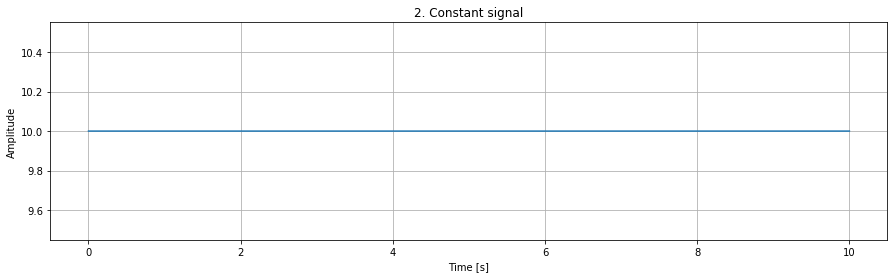

In [7]:
plt.figure(num=2, figsize=(15, 4))
plt.plot(time_series, const_series)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.title('2. Constant signal')
plt.grid(True)

###### 3. Random signal with specified distribution and given properties

In [8]:
# random signal 
# assuming normal distribution
# with given mean m = 0 and standard deviation std = 0.25
rand_m = 0.0
rand_std = 0.25
# series of the random
rand_series = np.random.normal(rand_m, rand_std, len(time_series))

###### Let us look at the plot to see how the signal looks like

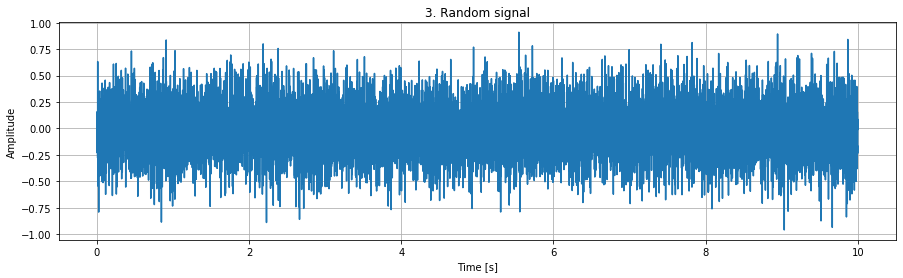

In [9]:
plt.figure(num=3, figsize=(15, 4))
plt.plot(time_series, rand_series)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.title('3. Random signal')
plt.grid(True)

### Exercise 2 : Different distributions and parameters for random signal 

Instead of the [normal](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html) distribution for the random signal try [lognormal](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.lognormal.html), [beta](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.beta.html), [standard normal](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html) and [uniform](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.uniform.html) distribution

In [10]:
#rand_series = np.random.lognormal(0, 0.25, len(time_series))
#rand_series = np.random.beta(1, 0.25, len(time_series))
#rand_series = np.random.rand(len(time_series))
#rand_series = np.random.uniform(0,1,len(time_series))

#### 4. Generic signal - for example a superposition of the above ones


A general signal (here) is represented as a superposition of the above three - constant, cosine and random signals

###### Superposed signal

The above three signals are superposed with corresponding weights

In [11]:
const_coeff = 1
cos_coeff = 0.25
rand_coeff = 0.25 
superposed_series = const_coeff * const_series + cos_coeff * cos_series + rand_coeff * rand_series

###### Let us look at the plot to see how the signal look like

In [12]:
# coefs -> weighting factors for the respective series of signals
def plot_superposed_signal(const_coeff = 1,cos_coeff = 0.25,rand_coeff = 0.25): 
    superposed_series = const_coeff * const_series + cos_coeff * cos_series + rand_coeff * rand_series
    fig = plt.figure(num=4, figsize=(15, 4))
    ax = plt.axes()
    ax.plot(time_series, superposed_series)
    ax.set_ylabel('Amplitude')
    ax.set_xlabel('Time [s]')
    ax.set_title('4. Superposed signal')
    ax.grid(True)
    plt.show()

###### Let us look at the plot to see how the signal look like

In [13]:
mean_plot=interactive(plot_superposed_signal, const_coeff = (0.0,10.0),cos_coeff = (0.0,5.0),rand_coeff = (0.0,2.0))
mean_plot

interactive(children=(FloatSlider(value=1.0, description='const_coeff', max=10.0), FloatSlider(value=0.25, des…

### Exercise 3: Different weights for superposition

Try different weights for the superposition. What do you observe in the plots?

Try different frequencies for the cosine function and observe the difference in the superposed signal. 

## Check Point 1: Discussion

#### Discuss among groups the observations and outcomes from exercise 1-3.

## 1.1 Statistical tools and quantities used to evaluate the signal

##### The following statistical quantities are computed for the given signal. 
1. Mean (Arithmetic) 
2. Root Mean Square (RMS)
3. Median 
4. Standard deviation
5. Skewness

Recall from the lecture the definitions of these quantities. 
These quantites can be computed using the inbuilt functions of numpy
[mean (arithmetic)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html),
[median](https://docs.scipy.org/doc/numpy/reference/generated/numpy.median.html),
[standard deviation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html#numpy.std)
and
[skewness](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.skew.html)


###### 1. Cosine signal with given amplitude and frequency 

In [14]:
# computing statistical quantitites (scalar values) and "converting" to an array for later plotting
cos_series_m = np.mean(cos_series) * np.ones(len(time_series))
cos_series_std = np.std(cos_series) * np.ones(len(time_series))
cos_series_rms = np.sqrt(np.mean(np.square(cos_series)))  * np.ones(len(time_series))

# printing statistical quantitites (scalar values) to the console
print('Mean: ', np.mean(cos_series))
print('STD: ', np.std(cos_series))
print('RMS: ', np.sqrt(np.mean(np.square(cos_series))))
print('Median: ', np.median(cos_series))
print('Skewness: ',(np.mean(cos_series) - np.median(cos_series))/np.std(cos_series))

Mean:  9.99999999999968e-05
STD:  0.7071421285710532
RMS:  0.7071421356417675
Median:  0.00015709533381615863
Skewness:  -8.074095929136108e-05


###### 2. Constant signal with given amplitude

In [15]:
const_series_m = np.mean(const_series) * np.ones(len(time_series))
const_series_std = np.std(const_series) * np.ones(len(time_series))
const_series_rms = np.sqrt(np.mean(np.square(const_series))) * np.ones(len(time_series))

print('Mean: ', np.mean(const_series))
print('STD: ', np.std(const_series))
print('RMS: ', np.sqrt(np.mean(np.square(const_series))))
print('Median: ', np.median(const_series))
#print('Skewness: ', (np.mean(const_series) - np.median(const_series))/np.std(const_series))

Mean:  10.0
STD:  0.0
RMS:  10.0
Median:  10.0


###### 3. Random signal with specified distribution and given properties

In [16]:
rand_series_m = np.mean(rand_series) * np.ones(len(time_series))
rand_series_std = np.std(rand_series) * np.ones(len(time_series))
rand_series_rms = np.sqrt(np.mean(np.square(rand_series))) * np.ones(len(time_series))

print('Mean: ', np.mean(rand_series))
print('STD: ', np.std(rand_series))
print('RMS: ', np.sqrt(np.mean(np.square(rand_series))))
print('Median: ', np.median(rand_series))
print('Skewness: ', (np.mean(rand_series) - np.median(rand_series))/np.std(rand_series))

Mean:  -0.005184349339632623
STD:  0.24958410597499628
RMS:  0.24963794469874473
Median:  -0.002638775445759004
Skewness:  -0.01019926282536853


#### Superposed signal


In [17]:
superposed_series_m = np.mean(superposed_series) * np.ones(len(time_series))
superposed_series_std = np.std(superposed_series) * np.ones(len(time_series))
superposed_series_rms = np.sqrt(np.mean(np.square(superposed_series))) * np.ones(len(time_series))

print('Mean: ', np.mean(superposed_series))
print('STD: ', np.std(superposed_series))
print('RMS: ', np.sqrt(np.mean(np.square(superposed_series))))
print('Median: ', np.median(superposed_series))
print('Skewness: ', (np.mean(superposed_series) - np.median(superposed_series))/np.std(superposed_series))

Mean:  9.998728912665092
STD:  0.18632259572093587
RMS:  10.000464788130651
Median:  9.99875654700882
Skewness:  -0.0001483145059349997


What do the mean, median, mode, RMS, standard deviation and skewness represent?  

### Histogram of the signals

The variation of each signal with time and their histograms are plotted.

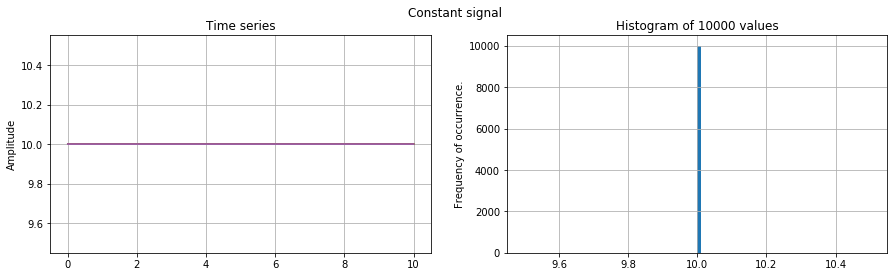

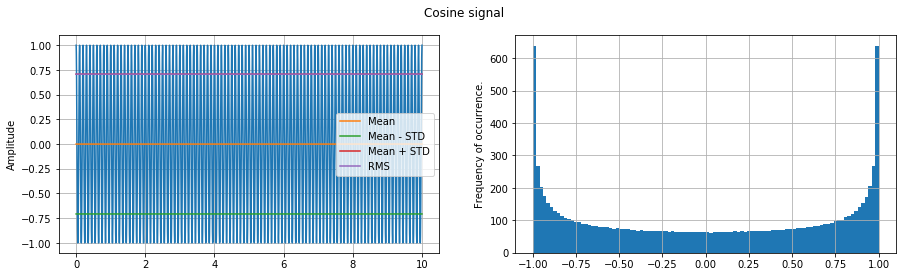

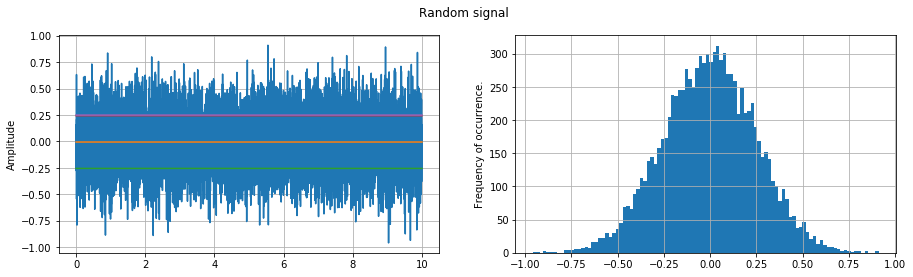

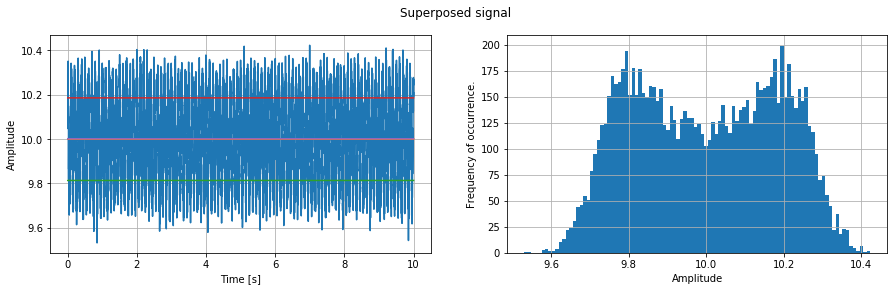

In [18]:
# const
plt.figure(num=5, figsize=(15, 4))
plt.suptitle('Constant signal')
plt.subplot(1, 2, 1)
plt.plot(time_series, const_series,
         time_series, const_series_m,
         time_series, const_series_m - const_series_std,
         time_series, const_series_m + const_series_std,
         time_series, const_series_rms)
plt.ylabel('Amplitude')
plt.title('Time series')
plt.grid(True)

bins = 100
plt.subplot(1, 2, 2)
plt.hist(const_series, bins)
plt.title('Histogram of ' + str(n_steps) +' values')
plt.ylabel('Frequency of occurrence.')
plt.grid(True)

# cos
plt.figure(num=6, figsize=(15, 4))
plt.suptitle('Cosine signal')
plt.subplot(1, 2, 1)
plt.plot(time_series, cos_series) 
plt.plot(time_series, cos_series_m, label = 'Mean') 
plt.plot(time_series, cos_series_m - cos_series_std, label = 'Mean - STD') 
plt.plot(time_series, cos_series_m + cos_series_std,label = 'Mean + STD') 
plt.plot(time_series, cos_series_rms, label = 'RMS') 
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(cos_series, bins)
plt.ylabel('Frequency of occurrence.')
plt.grid(True)


# rand
plt.figure(num=7, figsize=(15, 4))
plt.suptitle('Random signal')
plt.subplot(1, 2, 1)
plt.plot(time_series, rand_series,
         time_series, rand_series_m,
         time_series, rand_series_m - rand_series_std,
         time_series, rand_series_m + rand_series_std,
         time_series, rand_series_rms)
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(rand_series, bins)
plt.ylabel('Frequency of occurrence.')
plt.grid(True)

# superposed
plt.figure(num=8, figsize=(15, 4))
plt.suptitle('Superposed signal')
plt.subplot(1, 2, 1)
plt.plot(time_series, superposed_series,
         time_series, superposed_series_m,
         time_series, superposed_series_m -  superposed_series_std,
         time_series, superposed_series_m +  superposed_series_std,
         time_series, superposed_series_rms)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(superposed_series, bins)
plt.ylabel('Frequency of occurrence.')
plt.xlabel('Amplitude')
plt.grid(True)


### Interquartile range and percentile 

The [interquartile range (IQR)](https://en.wikipedia.org/wiki/Interquartile_range) , also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion. This is computed as the difference between 75th and 25th percentiles, or between upper and lower quartiles. In statistics of extreme values the interquartile range is also considered along with standard deviation as a measure of the dispersion.
The [percentile](https://en.wikipedia.org/wiki/Percentile) is a measure used in statistics indicating the value below which a given percentage of observations in a group of observations fall. These quantites can be computed using the inbuilt functions of numpy
[interquartile range (IQR)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.iqr.html)
[percentile](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html)

In [19]:
iqr = scipy.stats.iqr(superposed_series)
q75, q25 = np.percentile(superposed_series, [75 ,25])
print('Interquartile range = ',iqr, 'Interquantile range computed = ', q75-q25)

Interquartile range =  0.3315252308862373 Interquantile range computed =  0.3315252308862373


The [boxplots](https://en.wikipedia.org/wiki/Box_plot) can be obtained from the interquartile range to identify possible outliers. The box indicate the middle quartile and the lines extending indicating the variability outside the lower and upper quartiles. The in built python function [boxplots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html) can be used for plotting.

In [20]:
# coefs -> weighting factors for the respective series of signals
def boxplot_superposed_signal(const_coeff = 1,cos_coeff = 0.25,rand_coeff = 0.25): 
    superposed_series = const_coeff * const_series + cos_coeff * cos_series + rand_coeff * rand_series
    fig = plt.figure(num=9, figsize=(6, 8))
    ax = plt.axes()
    ax.boxplot(superposed_series)
    ax.grid(True)
    plt.show()

###### Let us look at the plot to see how the signal look like

In [21]:
box_plot=interactive(boxplot_superposed_signal, const_coeff = (0.0,10.0),cos_coeff = (0.0,5.0),rand_coeff = (0.0,10))
box_plot

interactive(children=(FloatSlider(value=1.0, description='const_coeff', max=10.0), FloatSlider(value=0.25, des…

### Probability Distribution Function (PDF) and Cumulative Distribution Function (CDF) 

The PDF and CDF of the signals are derived and are plotted later. Recall from the lecture the definitions of PDF, CDF of a continuous random variables.

##### Tip: Have a look at the get_pdf  function in the "custom_utilities.py" for details 

In [22]:
# const
[const_pdf_x, const_pdf_y] = c_utils.get_pdf(const_series,'Constant')
# the 'Constant' is used for obtaining pdf of a constant signal. 
# check the implimentation for details 

# cos
[cos_pdf_x, cos_pdf_y] = c_utils.get_pdf(cos_series)

# rand
[rand_pdf_x, rand_pdf_y] = c_utils.get_pdf(rand_series)

# superposed
[superposed_pdf_x, superposed_pdf_y] = c_utils.get_pdf(superposed_series)

### Converting to Frequency domain - Fast Fourier Transform  (FFT) 

FFT computes the frequency contents of the given signal. Recall from the lecture the basic definitions and procedure for FFT.

##### Tip: Have a look at the get_fft function in the "custom_utilities.py"  for details 

In [23]:
# sampling frequency the same in this case for all time series
sampling_freq = 1/delta_time

# const
[const_freq_half, const_series_fft] = c_utils.get_fft(const_series, sampling_freq)

# cos
[cos_freq_half, cos_series_fft] = c_utils.get_fft(cos_series, sampling_freq)

# rand
[rand_freq_half, rand_series_fft] = c_utils.get_fft(rand_series, sampling_freq)

# superposed
[superposed_freq_half, superposed_series_fft] = c_utils.get_fft(superposed_series, sampling_freq)

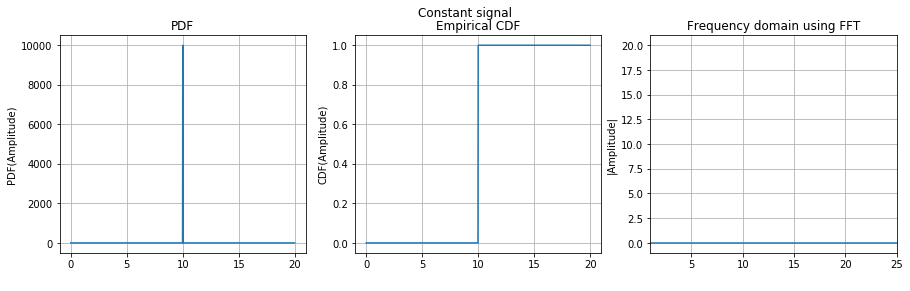

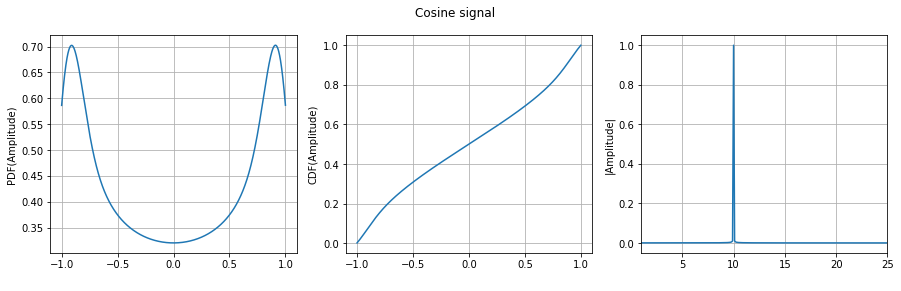

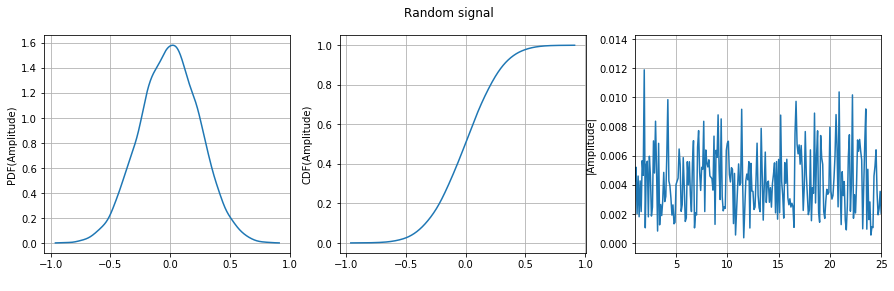

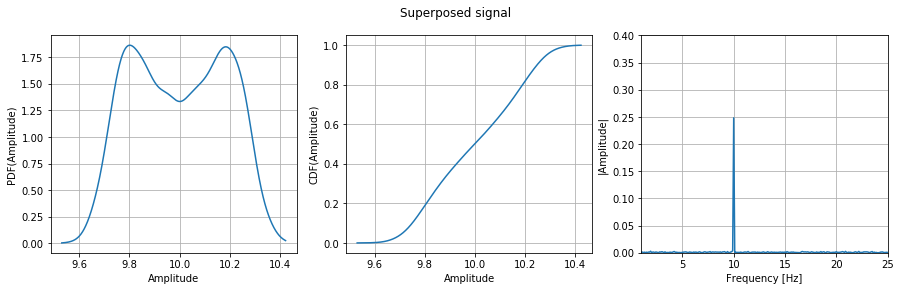

In [24]:
# pdf, cdf and frequency domain
plt.rcParams["figure.figsize"] = (15,4)

# const
plt.figure(num=10)
plt.suptitle('Constant signal')

plt.subplot(1,3,1)
plt.plot(const_pdf_x, const_pdf_y)
plt.xlabel(' ')
plt.ylabel('PDF(Amplitude)')
plt.title('PDF')
plt.grid(True)

const_ecdf = c_utils.get_ecdf(const_pdf_x, const_pdf_y)

plt.subplot(1,3,2)
plt.plot(const_pdf_x, const_ecdf)
plt.ylabel('CDF(Amplitude)')
plt.title('Empirical CDF')
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(const_freq_half, const_series_fft)
plt.xlim([1, 25])
plt.ylabel('|Amplitude|')
plt.title('Frequency domain using FFT')
plt.grid(True)
plt.show()

# cos
plt.figure(num=11)
plt.suptitle('Cosine signal')

plt.subplot(1,3,1)
plt.plot(cos_pdf_x, cos_pdf_y)
plt.xlabel(' ')
plt.ylabel('PDF(Amplitude)')
plt.grid(True)

cos_ecdf = c_utils.get_ecdf(cos_pdf_x, cos_pdf_y)

plt.subplot(1,3,2)
plt.plot(cos_pdf_x, cos_ecdf)
plt.ylabel('CDF(Amplitude)')
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(cos_freq_half, cos_series_fft)
plt.xlim([1, 25])
plt.ylabel('|Amplitude|')
plt.grid(True)
plt.show()

# rand
plt.figure(num=12)
plt.suptitle('Random signal')
plt.subplot(1,3,1)
plt.plot(rand_pdf_x, rand_pdf_y)
plt.xlabel(' ')
plt.ylabel('PDF(Amplitude)')
plt.grid(True)

rand_ecdf = c_utils.get_ecdf(rand_pdf_x, rand_pdf_y)

plt.subplot(1,3,2)
plt.plot(rand_pdf_x, rand_ecdf)
plt.ylabel('CDF(Amplitude)')
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(rand_freq_half, rand_series_fft)
plt.xlim([1, 25])
plt.ylabel('|Amplitude|')
plt.grid(True)

plt.show()

# superposed
plt.figure(num=13)
plt.suptitle('Superposed signal')
plt.subplot(1,3,1)
plt.plot(superposed_pdf_x, superposed_pdf_y)
plt.xlabel(' ')
plt.ylabel('PDF(Amplitude)')
plt.xlabel('Amplitude')
plt.grid(True)

superposed_ecdf = c_utils.get_ecdf(superposed_pdf_x, superposed_pdf_y)

plt.subplot(1,3,2)
plt.plot(superposed_pdf_x, superposed_ecdf)
plt.ylabel('CDF(Amplitude)')
plt.xlabel('Amplitude')
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(superposed_freq_half, superposed_series_fft)
plt.ylim([0, 0.4])
plt.xlim([1, 25])
plt.xlabel('Frequency [Hz]')
plt.ylabel('|Amplitude|')
plt.grid(True)

plt.show()

PDF follows the normalized hystograms. Observe the predominant frequency in the superimposed signal. 

### Excercise 4: Try two or more harmonic function

Try two or more cosine functions and superimpose them. What difference do you observe?
What do you observe in the FFT plots? 

## Check Point 2: Discussion

#### Discuss among groups the uses of various statistical quantities and their significance.